### Exercice 1 Part 1

In [2]:
import pandas as pd

df = pd.read_csv(
    r"H:\CYTECHDATA\Downloads\base-des-lieux-et-des-equipements-culturels.csv",
    sep=";",
    encoding="utf-8",        # ou encoding="latin-1" si UTF-8 donne une erreur
    engine="python"          # pour être plus tolérant si le fichier contient des irrégularités
)

print(df.head())
print(df.columns)


                                           Source  \
0  Médiathèque de l'architecture et du patrimoine   
1  Médiathèque de l'architecture et du patrimoine   
2  Médiathèque de l'architecture et du patrimoine   
3  Médiathèque de l'architecture et du patrimoine   
4  Médiathèque de l'architecture et du patrimoine   

                                 Nom                             Adresse  \
0  Presbytère du curé d'Ars (ancien)                                 NaN   
1     Eglise Saint-François d'Assise                                 NaN   
2      Maison May et ancien oratoire  34 r. des Cordeliers r. Saint-Jean   
3                Eglise de Luthézieu                                 NaN   
4                              Ferme                       Ham. de Layat   

  Complement Adresse Code Postal libelle_geographique code_insee  \
0                NaN       01480      Ars-sur-Formans      01021   
1                NaN       01480           Beauregard      01030   
2                NaN

In [3]:
colonnes_a_garder = [
    "Nom",
    "Région",
    "Type équipement ou lieu",
    "Domaine",
    "Latitude",
    "Longitude"
]

df_filtré = df[colonnes_a_garder]

print(df_filtré.head())

                                 Nom                Région  \
0  Presbytère du curé d'Ars (ancien)  Auvergne-Rhône-Alpes   
1     Eglise Saint-François d'Assise  Auvergne-Rhône-Alpes   
2      Maison May et ancien oratoire  Auvergne-Rhône-Alpes   
3                Eglise de Luthézieu  Auvergne-Rhône-Alpes   
4                              Ferme  Auvergne-Rhône-Alpes   

  Type équipement ou lieu     Domaine   Latitude  Longitude  
0                Monument  Patrimoine  45.991947   4.822285  
1                Monument  Patrimoine  46.000481   4.754276  
2                Monument  Patrimoine  45.758291   5.688635  
3                Monument  Patrimoine  45.889209   5.655738  
4                Monument  Patrimoine  46.369727   4.993248  


In [4]:
regions_cibles = ["Bretagne", "Nouvelle-Aquitaine"]

df_selection = df_filtré[df_filtré["Région"].isin(regions_cibles)]

print(df_selection.head())
print(len(df_selection), "lignes sélectionnées")


                         Nom              Région Type équipement ou lieu  \
1257    Croix de la Tuilière  Nouvelle-Aquitaine                Monument   
1258    Eglise Saint-Caprais  Nouvelle-Aquitaine                Monument   
1259      Château de Roissac  Nouvelle-Aquitaine                Monument   
1260    Eglise Saint-Martial  Nouvelle-Aquitaine                Monument   
1261  Maison de la Marbrerie  Nouvelle-Aquitaine                Monument   

         Domaine   Latitude  Longitude  
1257  Patrimoine  45.775020   0.332730  
1258  Patrimoine  45.776895   0.336961  
1259  Patrimoine  45.610658  -0.294483  
1260  Patrimoine  45.644298   0.148172  
1261  Patrimoine  45.647801   0.162681  
16357 lignes sélectionnées


In [5]:
# Séparation des deux régions
df_bretagne = df_filtré[df_filtré["Région"] == "Bretagne"]
df_na = df_filtré[df_filtré["Région"] == "Nouvelle-Aquitaine"]

# Export CSV
df_bretagne.to_csv("equipements_bretagne.csv", index=False, sep=";")
df_na.to_csv("equipements_nouvelle_aquitaine.csv", index=False, sep=";")

print("Exports terminés.")

Exports terminés.


In [6]:
totaux_bretagne = df_bretagne.groupby("Domaine").size().reset_index(name="Total")
totaux_na = df_na.groupby("Domaine").size().reset_index(name="Total")

print("Totaux par domaine - Bretagne :")
print(totaux_bretagne)

print("\nTotaux par domaine - Nouvelle-Aquitaine :")
print(totaux_na)

Totaux par domaine - Bretagne :
                  Domaine  Total
0                Archives     44
1       Arts du spectacle     68
2            Arts visuels      5
3                  Cinéma    128
4        Lecture publique   1101
5         Livre et presse    586
6              Patrimoine   3498
7  Éducation et formation     26

Totaux par domaine - Nouvelle-Aquitaine :
                  Domaine  Total
0                Archives    101
1       Arts du spectacle    135
2            Arts visuels     11
3                  Cinéma    238
4        Lecture publique   2019
5         Livre et presse   1155
6              Patrimoine   7199
7  Éducation et formation     43


### Ex 1 Part 2

In [9]:
df_selection.info()
print(df_selection.columns)


<class 'pandas.core.frame.DataFrame'>
Index: 16357 entries, 1257 to 88032
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Nom                      16357 non-null  object 
 1   Région                   16357 non-null  object 
 2   Type équipement ou lieu  16357 non-null  object 
 3   Domaine                  16357 non-null  object 
 4   Latitude                 16357 non-null  float64
 5   Longitude                16357 non-null  float64
dtypes: float64(2), object(4)
memory usage: 894.5+ KB
Index(['Nom', 'Région', 'Type équipement ou lieu', 'Domaine', 'Latitude',
       'Longitude'],
      dtype='object')


In [11]:
tcd = df_selection.pivot_table(
    index=["Région", "Type équipement ou lieu"],
    aggfunc="size"          # équivalent COUNTA, compte les lignes
).reset_index(name="Total")

print(tcd)


                Région                 Type équipement ou lieu  Total
0             Bretagne                            Bibliothèque   1101
1             Bretagne                            Centre d'art      5
2             Bretagne           Centre de création artistique      7
3             Bretagne             Centre de création musicale      1
4             Bretagne                                  Cinéma    128
5             Bretagne                           Conservatoire     19
6             Bretagne                          Espace protégé     84
7             Bretagne                               Librairie    269
8             Bretagne                      Lieu archéologique     53
9             Bretagne                         Lieu de mémoire      8
10            Bretagne                                Monument   3275
11            Bretagne                                   Musée     53
12            Bretagne       Papeterie et maisons de la presse    317
13            Bretag

In [12]:
tcd.to_csv("tcd_equipements_par_region.csv", index=False, sep=";")


In [13]:
tcd = df_selection.pivot_table(
    index=["Région", "Type équipement ou lieu"],
    aggfunc="size"
).reset_index(name="Total")


In [14]:
# Calcul du total des équipements par région
totaux_par_region = tcd.groupby("Région")["Total"].transform("sum")

# Ajout de la colonne Pourcentage
tcd["Pourcentage"] = tcd["Total"] / totaux_par_region * 100


In [15]:
table_datawrapper = tcd.pivot(
    index="Région",
    columns="Type équipement ou lieu",
    values="Pourcentage"
)


In [16]:
table_datawrapper = table_datawrapper.fillna(0)


In [17]:
table_datawrapper.to_csv("datawrapper_equipements_pourcentages.csv", sep=";")


In [18]:
print("=== TCD avec pourcentages par région ===")
print(tcd)

print("\n=== Tableau final prêt pour Datawrapper ===")
print(table_datawrapper)


=== TCD avec pourcentages par région ===
                Région                 Type équipement ou lieu  Total  \
0             Bretagne                            Bibliothèque   1101   
1             Bretagne                            Centre d'art      5   
2             Bretagne           Centre de création artistique      7   
3             Bretagne             Centre de création musicale      1   
4             Bretagne                                  Cinéma    128   
5             Bretagne                           Conservatoire     19   
6             Bretagne                          Espace protégé     84   
7             Bretagne                               Librairie    269   
8             Bretagne                      Lieu archéologique     53   
9             Bretagne                         Lieu de mémoire      8   
10            Bretagne                                Monument   3275   
11            Bretagne                                   Musée     53   
12        

In [19]:
# 1) TCD total par type et par région
tcd = df_selection.pivot_table(
    index=["Région", "Type équipement ou lieu"],
    aggfunc="size"
).reset_index(name="Total")

# 2) Ajouter le pourcentage
totaux_par_region = tcd.groupby("Région")["Total"].transform("sum")
tcd["Pourcentage"] = tcd["Total"] / totaux_par_region * 100

# 3) Garder les 4 plus importants par région (tri par Total)
tcd_top4 = (
    tcd.sort_values(["Région", "Total"], ascending=[True, False])
       .groupby("Région")
       .head(4)
)

# 4) Mise en forme Datawrapper (pivot)
table_datawrapper = tcd_top4.pivot(
    index="Région",
    columns="Type équipement ou lieu",
    values="Pourcentage"
).fillna(0)

# 5) PRINT
print("=== Top 4 types d'équipements par région (TCD) ===")
print(tcd_top4)

print("\n=== Tableau final Datawrapper (top 4 seulement) ===")
print(table_datawrapper)


# Export CSV pour Datawrapper
table_datawrapper.to_csv("datawrapper_equipements_top4.csv", sep=";", index=True)


=== Top 4 types d'équipements par région (TCD) ===
                Région            Type équipement ou lieu  Total  Pourcentage
10            Bretagne                           Monument   3275    60.025660
0             Bretagne                       Bibliothèque   1101    20.179619
12            Bretagne  Papeterie et maisons de la presse    317     5.810117
7             Bretagne                          Librairie    269     4.930352
29  Nouvelle-Aquitaine                           Monument   6554    60.122925
18  Nouvelle-Aquitaine                       Bibliothèque   2019    18.521237
32  Nouvelle-Aquitaine  Papeterie et maisons de la presse    763     6.999358
26  Nouvelle-Aquitaine                          Librairie    392     3.596000

=== Tableau final Datawrapper (top 4 seulement) ===
Type équipement ou lieu  Bibliothèque  Librairie   Monument  \
Région                                                        
Bretagne                    20.179619   4.930352  60.025660   
Nouve

### Exercice 3

In [2]:
import pandas as pd

df_bret = pd.read_csv(
    r"H:\CYTECHDATA\Downloads\Effectifs-de-l-enseignement-bilingue-par-commune-en-2025.csv",
    encoding="latin-1",
    sep=";"
)


print(df_bret.columns)


Index(['kod_ebssa', 'departamant', 'bro_brezhoneg', 'bro_galleg',
       'dpke_brezhoneg', 'dpke_galleg', 'kumun_brezhoneg', 'kumun_galleg',
       'skol-vamm', 'skol-gentañ', 'skolaj', 'lise', 'hollad'],
      dtype='object')


In [3]:
df_bret.head

<bound method NDFrame.head of       kod_ebssa  departamant   bro_brezhoneg            bro_galleg  \
0    code_insee  departement     pays_breton         pays_francais   
1         22387           22      Bro Dreger        Pays du Trégor   
2         22004           22    Bro Gwengamp      Pays de Guingamp   
3         22055           22  Bro Sant-Brieg  Pays de Saint-Brieuc   
4         22013           22    Bro Gwengamp      Pays de Guingamp   
..          ...          ...             ...                   ...   
211       56243           56   Bro Kêr-Wened        Pays de Vannes   
212       56137           56   Bro Kêr-Wened        Pays de Vannes   
213       56248           56   Bro Kêr-Wened        Pays de Vannes   
214       56251           56   Bro Kêr-Wened        Pays de Vannes   
215       56090           56   Bro an Oriant       Pays de Lorient   

                                   dpke_brezhoneg  \
0                                     epci_breton   
1                      

In [18]:
df_bret["hollad"] = pd.to_numeric(df_bret["hollad"], errors="coerce")


In [19]:
top10 = df_bret.nlargest(10, "hollad")
print(top10)


    kod_ebssa departamant            bro_brezhoneg  \
146     35238          35              Bro Roazhon   
45      29019          29                Bro Brest   
63      29232          29                Bro Gerne   
94      29189          29                Bro Brest   
153     44109          44               Bro Naoned   
167     56260          56            Bro Kêr-Wened   
192     56121          56            Bro an Oriant   
19      22113          22               Bro Dreger   
72      29103          29                Bro Brest   
59      29024          29  Bro Kornôg-Kreiz-Breizh   

                        bro_galleg                    dpke_brezhoneg  \
146                 Pays de Rennes                   Roazhon Meurgêr   
45                   Pays de Brest                     Brest Meurgêr   
63             Pays de Cornouaille                Kemper Breizh-Izel   
94                   Pays de Brest                     Brest Meurgêr   
153                 Pays de Nantes           

C:\Users\cytech\AppData\Local\Temp\ipykernel_15116\2088375173.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap("viridis")


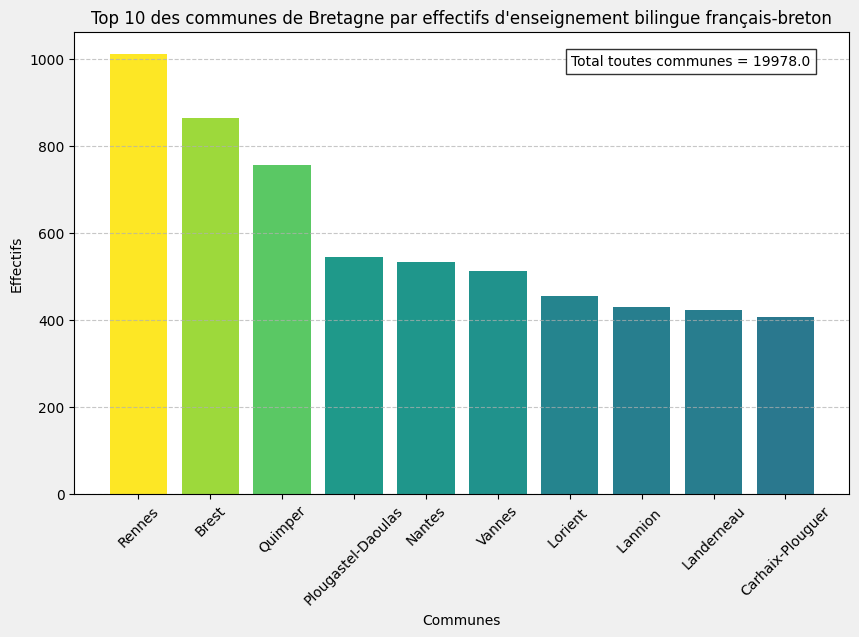

In [29]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Sélection des 10 plus grandes valeurs
top10 = df_bret.nlargest(10, "hollad")

# Palette viridis
cmap = cm.get_cmap("viridis")
colors = cmap(top10["hollad"] / top10["hollad"].max())

# Somme totale sur toutes les communes
total_hollad_all = df_bret["hollad"].sum()

# Création de la figure
plt.figure(figsize=(10,6))
plt.gcf().patch.set_facecolor('#f0f0f0')  # Couleur de fond gris clair

# Bar chart
bars = plt.bar(top10["kumun_galleg"], top10["hollad"], color=colors)

# Labels et titre
plt.xlabel("Communes")
plt.ylabel("Effectifs")
plt.title("Top 10 des communes de Bretagne par effectifs d'enseignement bilingue français-breton")
plt.xticks(rotation=45)

# Ajouter une grille
plt.grid(True, axis='y', linestyle='--', alpha=0.7)  # grille horizontale

# Encadré avec la somme totale
plt.text(
    0.95, 0.95,
    f"Total toutes communes = {total_hollad_all}", 
    horizontalalignment='right', 
    verticalalignment='top',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin du fichier CSV
file_path = r"H:\CYTECHDATA\Documents\4A\Evolution-des-effectifs-bilingues-de-la-maternelle-au-lycee.csv"

# Lecture du CSV avec l'encodage Latin-1 et séparateur ;
df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Vérifier les colonnes
print(df.head())



    kod_ebssa  departamant bro_brezhoneg        bro_galleg  \
0  code_insee  departement   pays_breton     pays_francais   
1       22004           22  Bro Gwengamp  Pays de Guingamp   
2       22005           22  Bro Gwengamp  Pays de Guingamp   
3       22013           22  Bro Gwengamp  Pays de Guingamp   
4       22023           22  Bro Gwengamp  Pays de Guingamp   

             dpke_brezhoneg                     dpke_galleg  kumun_brezhoneg  \
0               epci_breton                   epci_francais   commune_breton   
1  Gwengamp-Pempoull Tolpad  Guingamp-Paimpol Agglomération             Bear   
2  Gwengamp-Pempoull Tolpad  Guingamp-Paimpol Agglomération          Benac'h   
3  Gwengamp-Pempoull Tolpad  Guingamp-Paimpol Agglomération        Boulvriag   
4  Gwengamp-Pempoull Tolpad  Guingamp-Paimpol Agglomération  Bulad-Pestivien   

          kumun_galleg    1999    2000  ...    2016    2017    2018    2019  \
0     commune_francais  1999.0  2000.0  ...  2016.0  2017.0  2018.0

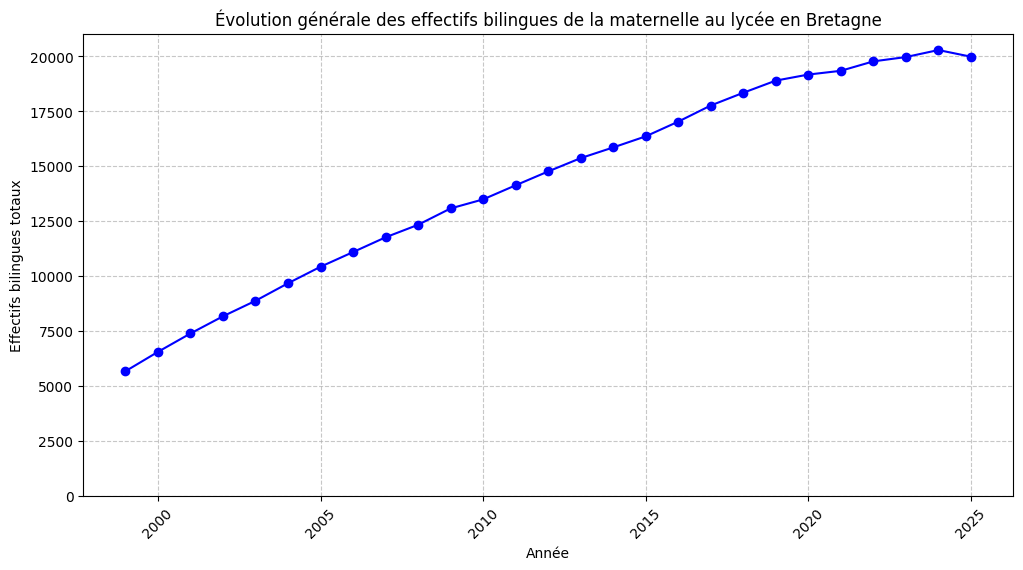

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemin du fichier CSV
file_path = r"H:\CYTECHDATA\Documents\4A\Evolution-des-effectifs-bilingues-de-la-maternelle-au-lycee.csv"

# Lecture du CSV avec encodage Latin-1 et séparateur ;
df = pd.read_csv(file_path, encoding='latin1', sep=';')

# Supprimer la première ligne si elle contient les anciens noms de colonnes
if df.iloc[0,0] == 'code_insee':
    df = df.drop(0)

# Extraire les colonnes années (toutes les colonnes qui peuvent être converties en int)
year_cols = [col for col in df.columns if col.isdigit()]

# Convertir les valeurs en float pour être sûr
df[year_cols] = df[year_cols].astype(float)

# Calculer les totaux par année
total_per_year = df[year_cols].sum()

# Calculer la somme totale finale
total_sum = total_per_year.sum()

# Line chart
plt.figure(figsize=(12,6))
plt.plot(total_per_year.index, total_per_year.values, marker='o', linestyle='-', color='blue')

plt.xlabel("Année")
plt.ylabel("Effectifs bilingues totaux")
plt.title("Évolution générale des effectifs bilingues de la maternelle au lycée en Bretagne")
plt.grid(True, linestyle='--', alpha=0.7)

# Forcer l'axe Y à commencer à 0
plt.ylim(bottom=0)

# Afficher seulement toutes les 5 années sur l'axe X
xticks = [year for year in total_per_year.index if int(year) % 5 == 0]
plt.xticks(xticks, rotation=45)



plt.show()


In [2]:
df.columns

Index(['kod_ebssa', 'departamant', 'bro_brezhoneg', 'bro_galleg',
       'dpke_brezhoneg', 'dpke_galleg', 'kumun_brezhoneg', 'kumun_galleg',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024', '2025'],
      dtype='object')

In [3]:
import geopandas as gpd
import folium
from shapely.geometry import box

# Charger les fichiers
formations = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\formationslonguesbreton.geojson")
groupes = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\groupeshebdomadairecours.geojson")
stages = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\stageslanguesbretonne2025.geojson")

# Harmoniser le CRS
formations = formations.to_crs(epsg=4326)
groupes = groupes.to_crs(epsg=4326)
stages = stages.to_crs(epsg=4326)

# Ajouter la colonne 'type'
formations['type'] = 'Formation longue'
groupes['type'] = 'Groupe hebdomadaire'
stages['type'] = 'Stage breton 2025'

# Filtrer sur la Bretagne (rectangle approximatif)
bretagne_bounds = box(-5.3, 47.0, -1.2, 49.2)
formations = formations[formations.geometry.within(bretagne_bounds)]
groupes = groupes[groupes.geometry.within(bretagne_bounds)]
stages = stages[stages.geometry.within(bretagne_bounds)]

# --- Dictionnaire de couleurs par type ---
colors = {
    'Formation longue': 'blue',
    'Groupe hebdomadaire': 'green',
    'Stage breton 2025': 'red'
}

# --- Créer la carte ---
bretagne_map = folium.Map(location=[48.0, -3.0], zoom_start=7)

# --- Fonction pour ajouter les couches avec couleur selon le type ---
def add_colored_layer(gdf, name):
    # Transformer le GeoDataFrame en GeoJSON
    geojson = gdf.to_json()
    folium.GeoJson(
        geojson,
        name=name,
        style_function=lambda feature: {
            'fillColor': colors.get(feature['properties']['type'], 'gray'),
            'color': colors.get(feature['properties']['type'], 'gray'),
            'weight': 2,
            'fillOpacity': 0.6
        },
        tooltip=folium.GeoJsonTooltip(fields=[c for c in gdf.columns if c != 'geometry'])
    ).add_to(bretagne_map)

# --- Ajouter les trois couches ---
add_colored_layer(formations, "Formations longues")
add_colored_layer(groupes, "Groupes hebdomadaires")
add_colored_layer(stages, "Stages breton 2025")

# Contrôle des couches
folium.LayerControl().add_to(bretagne_map)

# Légende
legend_html = """
<div style="position: fixed; 
     bottom: 50px; left: 50px; width: 180px; height: 110px; 
     border:2px solid grey; z-index:9999; font-size:14px;
     background-color:white; opacity: 0.8;
     padding: 10px;">
     <b>Légende</b><br>
     <i style="background:blue;color:blue;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Formation longue<br>
     <i style="background:green;color:green;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Groupe hebdomadaire<br>
     <i style="background:red;color:red;">&nbsp;&nbsp;&nbsp;&nbsp;</i> Stage breton 2025
</div>
"""
bretagne_map.get_root().html.add_child(folium.Element(legend_html))

# Sauvegarder
bretagne_map.save("bretagne_breton_interactive_colored.html")
print("Carte sauvegardée avec couleurs par type !")


Carte sauvegardée avec couleurs par type !


In [4]:
import pandas as pd

# Charger le CSV
file_path = r"H:\CYTECHDATA\Documents\4A\dataauqitaine.csv"
df_aqui = pd.read_csv(file_path)

# Grouper par 'annee' et sommer 'effectif_bilingue'
df_grouped = df_aqui.groupby('annee', as_index=False)['effectif_bilingue'].sum()

# Afficher le résultat
print(df_grouped)

# Sauvegarder si nécessaire
df_grouped.to_csv(r"H:\CYTECHDATA\Documents\4A\dataauqitaine_grouped.csv", index=False)


    annee  effectif_bilingue
0    2004               7549
1    2005               7995
2    2006               8538
3    2007               9110
4    2008               9686
5    2009              10196
6    2010              10669
7    2011              11137
8    2012              11468
9    2013              11844
10   2014              12208
11   2015              12735
12   2016              13145
13   2017              13714
14   2018              14222
15   2019              14583
16   2020              14582
17   2021              14704
18   2022              14835
19   2023              14981
20   2024              15301


In [5]:
df_grouped.columns

Index(['annee', 'effectif_bilingue'], dtype='object')

In [6]:
import pandas as pd

# -------------------------
# Bretagne
# -------------------------
file_path_bretagne = r"H:\CYTECHDATA\Documents\4A\Evolution-des-effectifs-bilingues-de-la-maternelle-au-lycee.csv"
df_bretagne = pd.read_csv(file_path_bretagne, encoding='latin1', sep=';')

# Supprimer la première ligne si elle contient des anciens noms de colonnes
if df_bretagne.iloc[0,0] == 'code_insee':
    df_bretagne = df_bretagne.drop(0)

# Extraire les colonnes années
year_cols_bretagne = [col for col in df_bretagne.columns if col.isdigit()]
df_bretagne[year_cols_bretagne] = df_bretagne[year_cols_bretagne].astype(float)

# Totaux par année pour Bretagne
total_bretagne = df_bretagne[year_cols_bretagne].sum()
df_bretagne_grouped = pd.DataFrame({
    'annee': total_bretagne.index.astype(int),
    'Bretagne': total_bretagne.values
})

# -------------------------
# Nouvelle-Aquitaine
# -------------------------
file_path_aqui = r"H:\CYTECHDATA\Documents\4A\dataauqitaine.csv"
df_aqui = pd.read_csv(file_path_aqui)

# Grouper par 'annee' et sommer 'effectif_bilingue'
df_aqui_grouped = df_aqui.groupby('annee', as_index=False)['effectif_bilingue'].sum()
df_aqui_grouped = df_aqui_grouped.rename(columns={'effectif_bilingue': 'Nouvelle-Aquitaine'})

# -------------------------
# Fusionner les deux régions
# -------------------------
# Fusion sur la colonne 'annee' pour avoir un DF commun
df_combine = pd.merge(df_bretagne_grouped, df_aqui_grouped, on='annee', how='outer')

# Trier par année
df_combine = df_combine.sort_values('annee').reset_index(drop=True)

print(df_combine)


    annee  Bretagne  Nouvelle-Aquitaine
0    1999    5673.0                 NaN
1    2000    6554.0                 NaN
2    2001    7391.0                 NaN
3    2002    8172.0                 NaN
4    2003    8877.0                 NaN
5    2004    9674.0              7549.0
6    2005   10425.0              7995.0
7    2006   11092.0              8538.0
8    2007   11764.0              9110.0
9    2008   12333.0              9686.0
10   2009   13077.0             10196.0
11   2010   13488.0             10669.0
12   2011   14129.0             11137.0
13   2012   14759.0             11468.0
14   2013   15365.0             11844.0
15   2014   15851.0             12208.0
16   2015   16355.0             12735.0
17   2016   17024.0             13145.0
18   2017   17758.0             13714.0
19   2018   18337.0             14222.0
20   2019   18890.0             14583.0
21   2020   19165.0             14582.0
22   2021   19336.0             14704.0
23   2022   19765.0             14835.0


C:\Users\cytech\AppData\Local\Temp\ipykernel_12524\510112800.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_bretagne = cm.get_cmap('Blues')
C:\Users\cytech\AppData\Local\Temp\ipykernel_12524\510112800.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_aquitaine = cm.get_cmap('Reds')


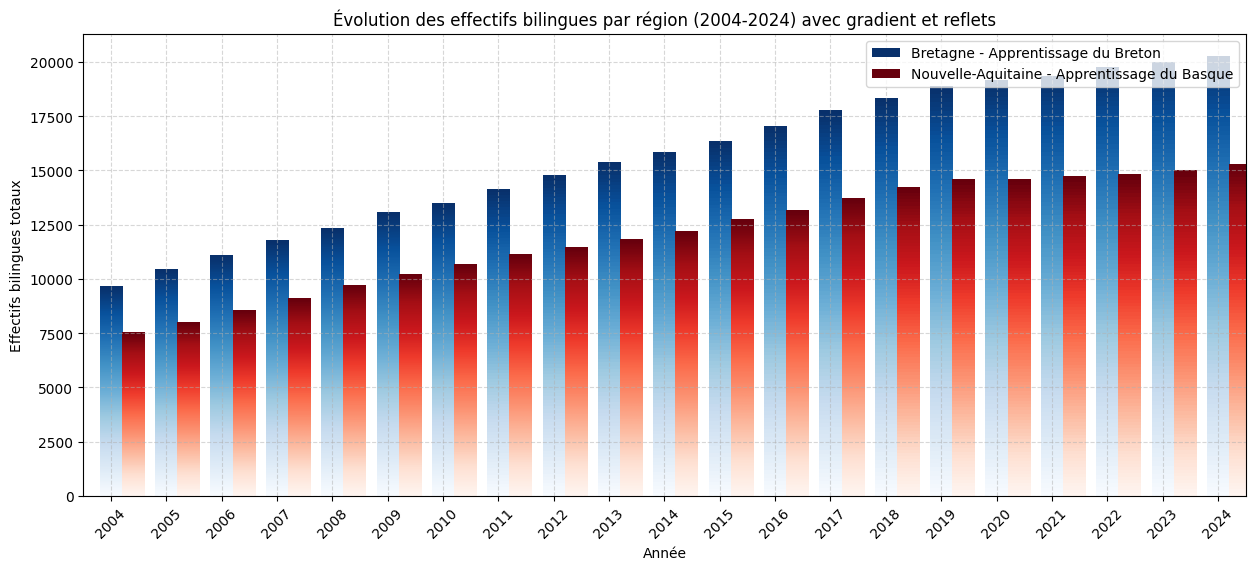

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
from matplotlib.patches import Patch

# Filtrer les années entre 2004 et 2024
df_filtered = df_combine[(df_combine['annee'] >= 2004) & (df_combine['annee'] <= 2024)].reset_index(drop=True)

width = 0.4
annees = df_filtered['annee']
x = np.arange(len(annees))

# Couleurs de base
cmap_bretagne = cm.get_cmap('Blues')
cmap_aquitaine = cm.get_cmap('Reds')

fig, ax = plt.subplots(figsize=(15,6))

max_val = max(df_filtered['Bretagne'].max(), df_filtered['Nouvelle-Aquitaine'].max())

for i, val in enumerate(df_filtered['Bretagne']):
    gradient = np.linspace(0.4, 1.0, 100).reshape(-1,1)
    ax.imshow(gradient, extent=[x[i]-width/2, x[i]-width/2+width, 0, val],
              origin='lower', aspect='auto', cmap=cmap_bretagne)

for i, val in enumerate(df_filtered['Nouvelle-Aquitaine']):
    gradient = np.linspace(0.4, 1.0, 100).reshape(-1,1)
    ax.imshow(gradient, extent=[x[i]+width/2, x[i]+width/2+width, 0, val],
              origin='lower', aspect='auto', cmap=cmap_aquitaine)

# Légende
legend_elements = [
    Patch(facecolor=cmap_bretagne(1.0), label='Bretagne - Apprentissage du Breton'),
    Patch(facecolor=cmap_aquitaine(1.0), label='Nouvelle-Aquitaine - Apprentissage du Basque')
]
ax.legend(handles=legend_elements)

# Labels et titre
ax.set_xlabel("Année")
ax.set_ylabel("Effectifs bilingues totaux")
ax.set_title("Évolution des effectifs bilingues par région (2004-2024) avec gradient et reflets")
ax.set_xticks(x)
ax.set_xticklabels(annees, rotation=45)
ax.grid(True, linestyle='--', alpha=0.5)

# Ajuster les axes pour échelle et marges
ax.set_ylim(0, max_val*1.05)         # petite marge verticale
ax.set_xlim(-0.5, len(annees)-0.5)  # petite marge horizontale sur les côtés

plt.show()


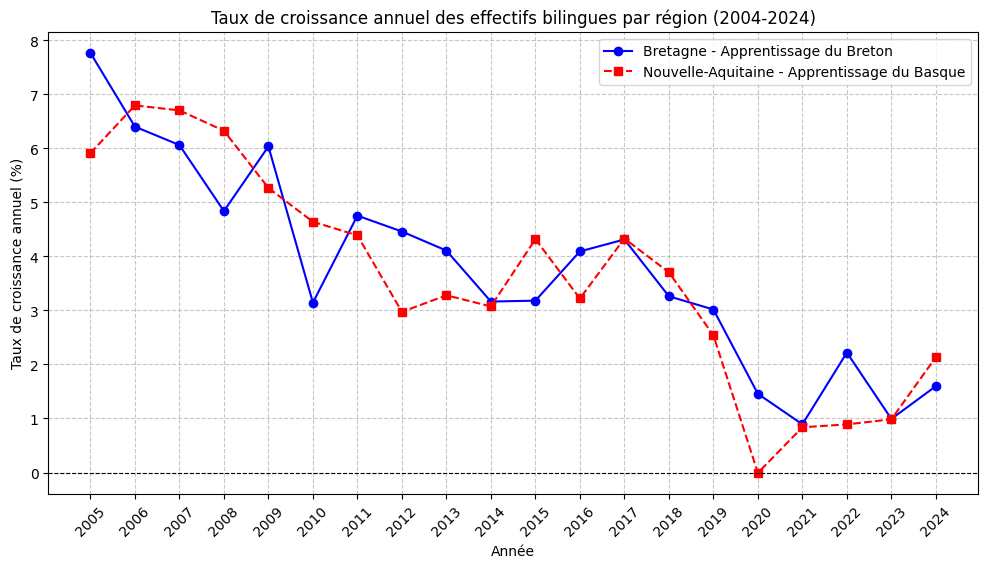

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# --- On suppose que df_combine est déjà créé ---
# Colonnes : ['annee', 'Bretagne', 'Nouvelle-Aquitaine']

# Filtrer années 2004 à 2024
df_filtered = df_combine[(df_combine['annee'] >= 2004) & (df_combine['annee'] <= 2024)].reset_index(drop=True)

# Calculer la croissance annuelle en pourcentage
df_filtered['Bretagne_growth'] = df_filtered['Bretagne'].pct_change() * 100
df_filtered['Nouvelle_Aquitaine_growth'] = df_filtered['Nouvelle-Aquitaine'].pct_change() * 100

# Supprimer la première ligne qui sera NaN (pas de croissance pour la première année)
df_growth = df_filtered.dropna().reset_index(drop=True)

# Plot
plt.figure(figsize=(12,6))
plt.plot(df_growth['annee'], df_growth['Bretagne_growth'], marker='o', linestyle='-', color='blue', label='Bretagne - Apprentissage du Breton')
plt.plot(df_growth['annee'], df_growth['Nouvelle_Aquitaine_growth'], marker='s', linestyle='--', color='red', label='Nouvelle-Aquitaine - Apprentissage du Basque')

plt.xlabel("Année")
plt.ylabel("Taux de croissance annuel (%)")
plt.title("Taux de croissance annuel des effectifs bilingues par région (2004-2024)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(df_growth['annee'], rotation=45)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)  # ligne horizontale à 0%
plt.show()


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


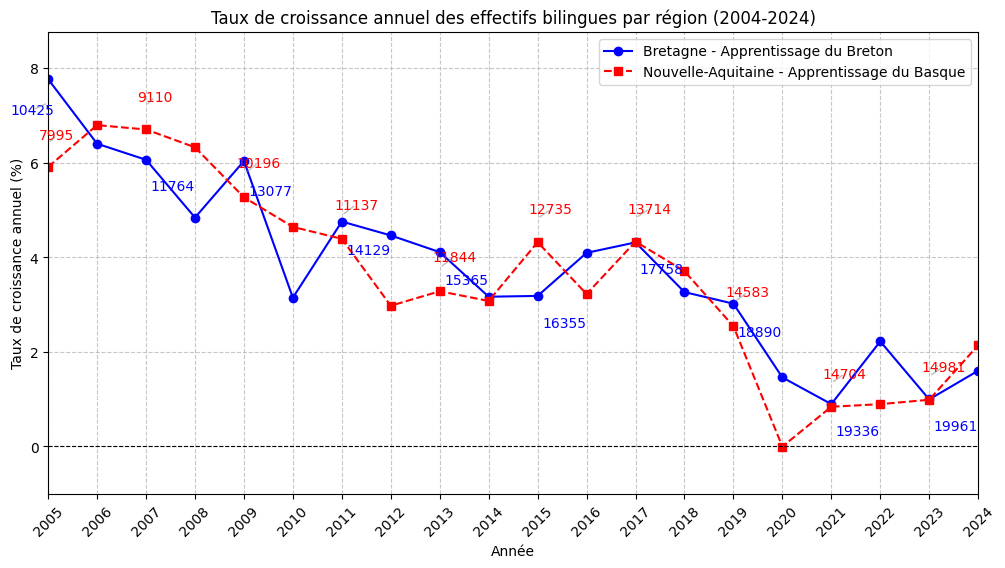

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from adjustText import adjust_text


# --- Filtrer années 2004 à 2024 ---
df_filtered = df_combine[(df_combine['annee'] >= 2004) & (df_combine['annee'] <= 2024)].reset_index(drop=True)

# Calculer la croissance annuelle en pourcentage
df_filtered['Bretagne_growth'] = df_filtered['Bretagne'].pct_change() * 100
df_filtered['Nouvelle_Aquitaine_growth'] = df_filtered['Nouvelle-Aquitaine'].pct_change() * 100

# Supprimer la première ligne qui sera NaN
df_growth = df_filtered.dropna().reset_index(drop=True)

# Plot
plt.figure(figsize=(12,6))

# Courbes
plt.plot(df_growth['annee'], df_growth['Bretagne_growth'], marker='o', linestyle='-', color='blue', label='Bretagne - Apprentissage du Breton')
plt.plot(df_growth['annee'], df_growth['Nouvelle_Aquitaine_growth'], marker='s', linestyle='--', color='red', label='Nouvelle-Aquitaine - Apprentissage du Basque')


from adjustText import adjust_text
import matplotlib.pyplot as plt

# Création des textes
texts = []
for i, row in df_growth.iterrows():
    if i % 2 == 0:
        # Bretagne en dessous de la courbe mais jamais en dessous de 0
        y_bret = max(row['Bretagne_growth'] - 0.5, 0.1)
        texts.append(plt.text(row['annee'], y_bret, f"{int(df_filtered.loc[i+1, 'Bretagne'])}", 
                              color='blue', ha='center', va='top'))
        
        # Nouvelle-Aquitaine au-dessus de la courbe
        y_aqui = row['Nouvelle_Aquitaine_growth'] + 0.5
        texts.append(plt.text(row['annee'], y_aqui, f"{int(df_filtered.loc[i+1, 'Nouvelle-Aquitaine'])}", 
                              color='red', ha='center', va='bottom'))

# Ajustement automatique pour éviter chevauchement
adjust_text(
    texts, 
    only_move={'points':'y', 'texts':'y'},  # déplacer uniquement verticalement
    arrowprops=dict(arrowstyle="-", color='gray', alpha=0.5),
    expand_points=(1.2, 1.2),  # empêche chevauchement avec les points
    expand_text=(1.2, 1.2)     # empêche chevauchement avec d'autres textes
)



# Labels et titre
plt.xlabel("Année")
plt.ylabel("Taux de croissance annuel (%)")
plt.title("Taux de croissance annuel des effectifs bilingues par région (2004-2024)")
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xticks(df_growth['annee'], rotation=45)

# Ligne horizontale à 0%
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)

# Zoom et supprimer marges
plt.ylim(min(df_growth[['Bretagne_growth','Nouvelle_Aquitaine_growth']].min())-1, 
         max(df_growth[['Bretagne_growth','Nouvelle_Aquitaine_growth']].max())+1)
plt.margins(x=0)  # pas de marge sur l'axe X

plt.show()


In [38]:
import geopandas as gpd


In [39]:
from cartiflette import carti_download

departements = carti_download(
    values="France",
    crs=4326,
    borders="DEPARTEMENT",
    vectorfile_format="geojson",
    filter_by="FRANCE_ENTIERE_DROM_RAPPROCHES",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022,
)

<Axes: >

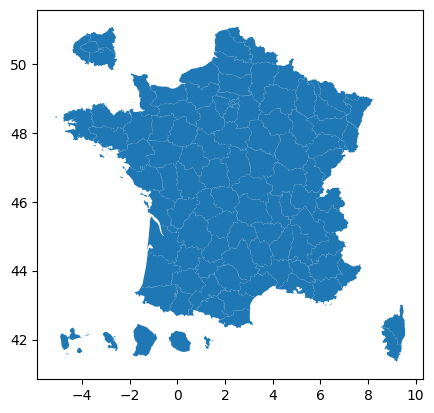

In [40]:
departements.to_crs(4326).plot()

<Axes: >

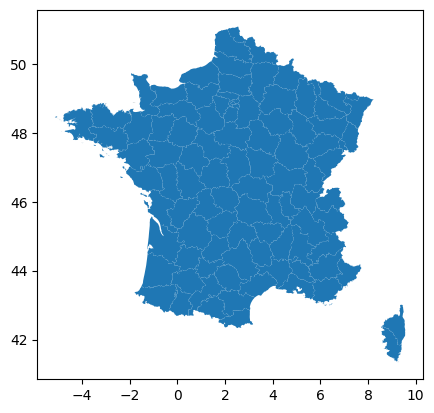

In [42]:
departements_no_duplicates = (
  departements
  .drop_duplicates(subset = "INSEE_DEP")
)
departements_hexagone = (
  departements_no_duplicates
  .loc[~departements['INSEE_DEP'].str.startswith("97")]
)

departements_hexagone.plot()

In [56]:
import geopandas as gpd

path = r"H:\CYTECHDATA\Downloads\Natural_Earth_quick_start\packages\Natural_Earth_quick_start\50m_cultural\ne_50m_admin_0_countries.shp"

gdf = gpd.read_file(path)
print(gdf.columns)


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


In [57]:
france = gdf[gdf["ADMIN"] == "France"]


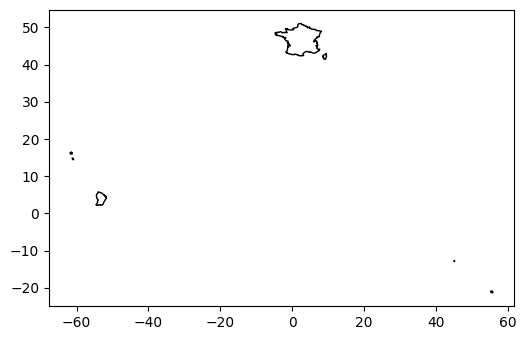

In [58]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")
france.plot(ax=ax, edgecolor="black", facecolor="white")

plt.show()


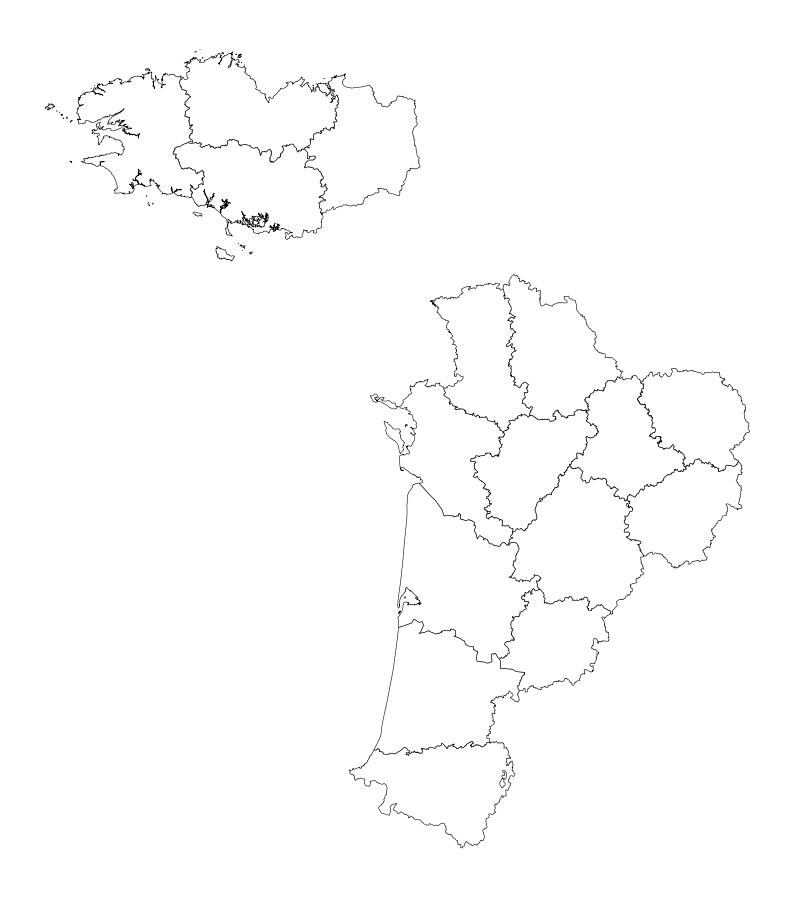

In [62]:
import geopandas as gpd
import matplotlib.pyplot as plt

path = r"H:\CYTECHDATA\Downloads\departements.geojson"
departements = gpd.read_file(path)

bretagne_codes = ["22", "29", "35", "56"]
na_codes = ["16", "17", "19", "23", "24", "33", "40", "47", "64", "79", "86", "87"]

subset = departements[departements["code"].isin(bretagne_codes + na_codes)]

fig, ax = plt.subplots(figsize=(10, 15), facecolor="white")
subset.plot(ax=ax, edgecolor="black", facecolor="white", linewidth=0.4)
ax.set_axis_off()
plt.show()


C:\Users\cytech\AppData\Local\Temp\ipykernel_12524\3686984855.py:19: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  region_union = regions.unary_union


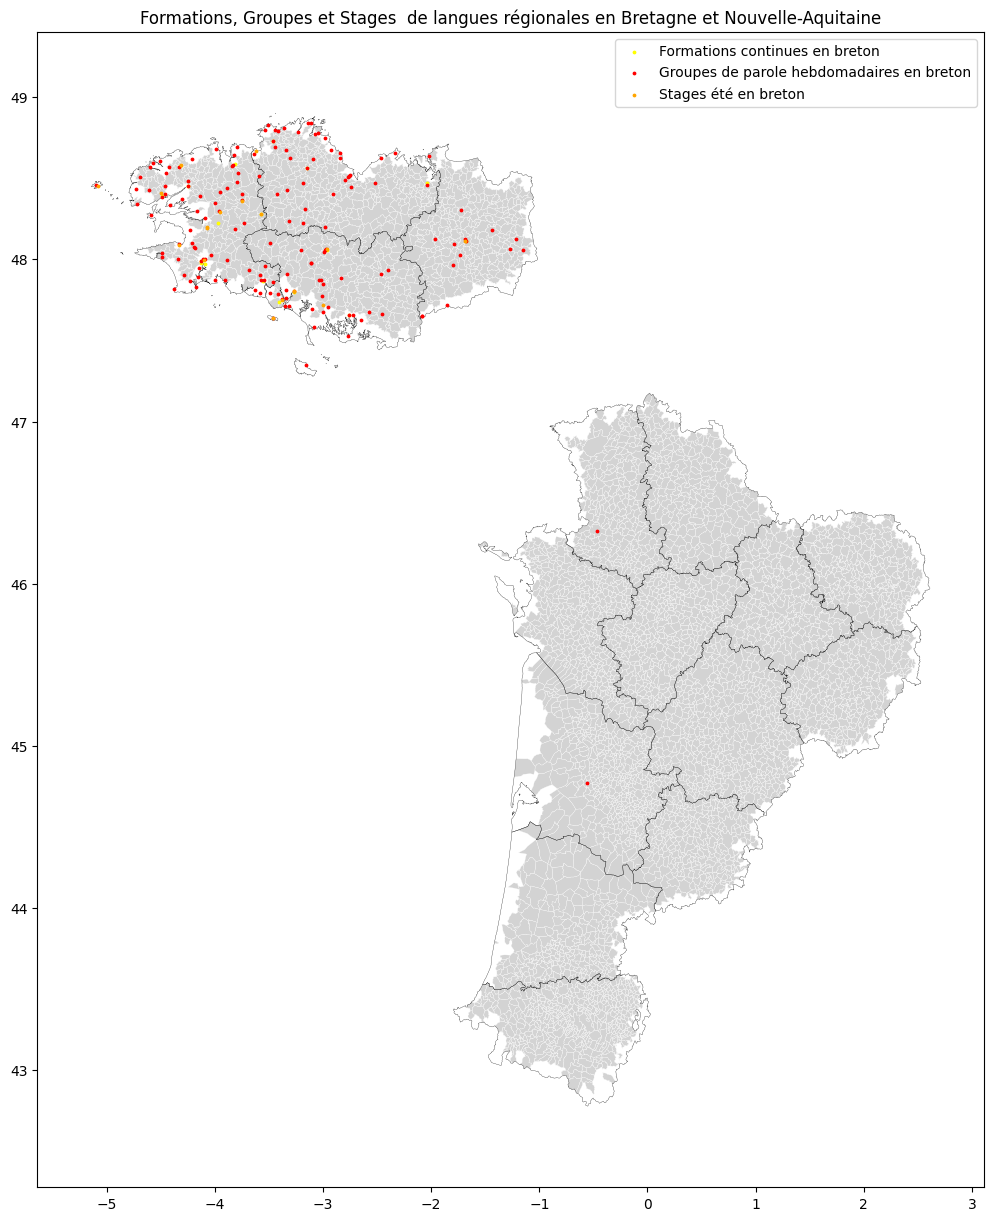

In [71]:
import geopandas as gpd
import matplotlib.pyplot as plt

# --- Charger les layers ---
communes = gpd.read_file(r"H:\CYTECHDATA\Downloads\communes.geojson")
dep_na   = gpd.read_file(r"H:\CYTECHDATA\Downloads\departements-nouvelle-aquitaine.geojson")
dep_bzh  = gpd.read_file(r"H:\CYTECHDATA\Downloads\departements-bretagne.geojson")

formations = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\formationslonguesbreton.geojson")
groupes    = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\groupeshebdomadairecours.geojson")
stages     = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\stageslanguesbretonne2025.geojson")

# --- Assurer un même système de coordonnées ---
for gdf in [communes, dep_na, dep_bzh, formations, groupes, stages]:
    gdf.to_crs(epsg=4326, inplace=True)

# --- Fusionner les départements pour définir la zone d'intérêt ---
regions = gpd.GeoDataFrame(pd.concat([dep_na, dep_bzh], ignore_index=True))
region_union = regions.unary_union

# --- Filtrer les communes et points pour ne garder que ceux dans les deux régions ---
communes_region = communes[communes.geometry.within(region_union)]
formations_region = formations[formations.geometry.within(region_union)]
groupes_region = groupes[groupes.geometry.within(region_union)]
stages_region = stages[stages.geometry.within(region_union)]

# --- Plot ---
fig, ax = plt.subplots(figsize=(15, 15))

# Layers de fond
communes_region.plot(ax=ax, color="lightgrey", edgecolor="white", linewidth=0.2)
dep_na.plot(ax=ax, color="none", edgecolor="black", linewidth=0.2)
dep_bzh.plot(ax=ax, color="none", edgecolor="black", linewidth=0.2)

# Points
formations_region.plot(ax=ax, color="yellow", markersize=3, label="Formations continues en breton")
groupes_region.plot(ax=ax, color="red", markersize=3, label="Groupes de parole hebdomadaires en breton")
stages_region.plot(ax=ax, color="orange", markersize=3, label="Stages été en breton")

# Zoom sur la zone d'intérêt
minx, miny, maxx, maxy = region_union.bounds
ax.set_xlim(minx - 0.5, maxx + 0.5)  # un petit buffer pour voir les bords
ax.set_ylim(miny - 0.5, maxy + 0.5)

# Affichage
ax.set_title("Formations, Groupes et Stages  de langues régionales en Bretagne et Nouvelle-Aquitaine")
ax.legend()
plt.show()


In [73]:
import pandas as pd

path_csv = r"H:\CYTECHDATA\Documents\4A\Effectifs-de-l-enseignement-bilingue-par-commune-en-2025.csv"

df = pd.read_csv(path_csv, sep=";", encoding="latin1")  # ISO-8859-1
print(df.columns)


Index(['kod_ebssa', 'departamant', 'bro_brezhoneg', 'bro_galleg',
       'dpke_brezhoneg', 'dpke_galleg', 'kumun_brezhoneg', 'kumun_galleg',
       'skol-vamm', 'skol-gentañ', 'skolaj', 'lise', 'hollad'],
      dtype='object')


In [77]:
# Convertir la colonne 'hollad' en entier, en forçant les erreurs à NaN
df['hollad'] = pd.to_numeric(df['hollad'], errors='coerce')

# Remplacer les NaN par 0 et convertir en int
df['hollad'] = df['hollad'].fillna(0).astype(int)

df['hollad'].head(10)


0      0
1     22
2    113
3     23
4     16
5     26
6     84
7     22
8    164
9     54
Name: hollad, dtype: int64

In [78]:
import geopandas as gpd

communes = gpd.read_file(r"H:\CYTECHDATA\Downloads\communes.geojson")
print(communes.columns)


Index(['code', 'nom', 'geometry'], dtype='object')


C:\Users\cytech\AppData\Local\Temp\ipykernel_12524\1290831944.py:33: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  region_union = regions.unary_union


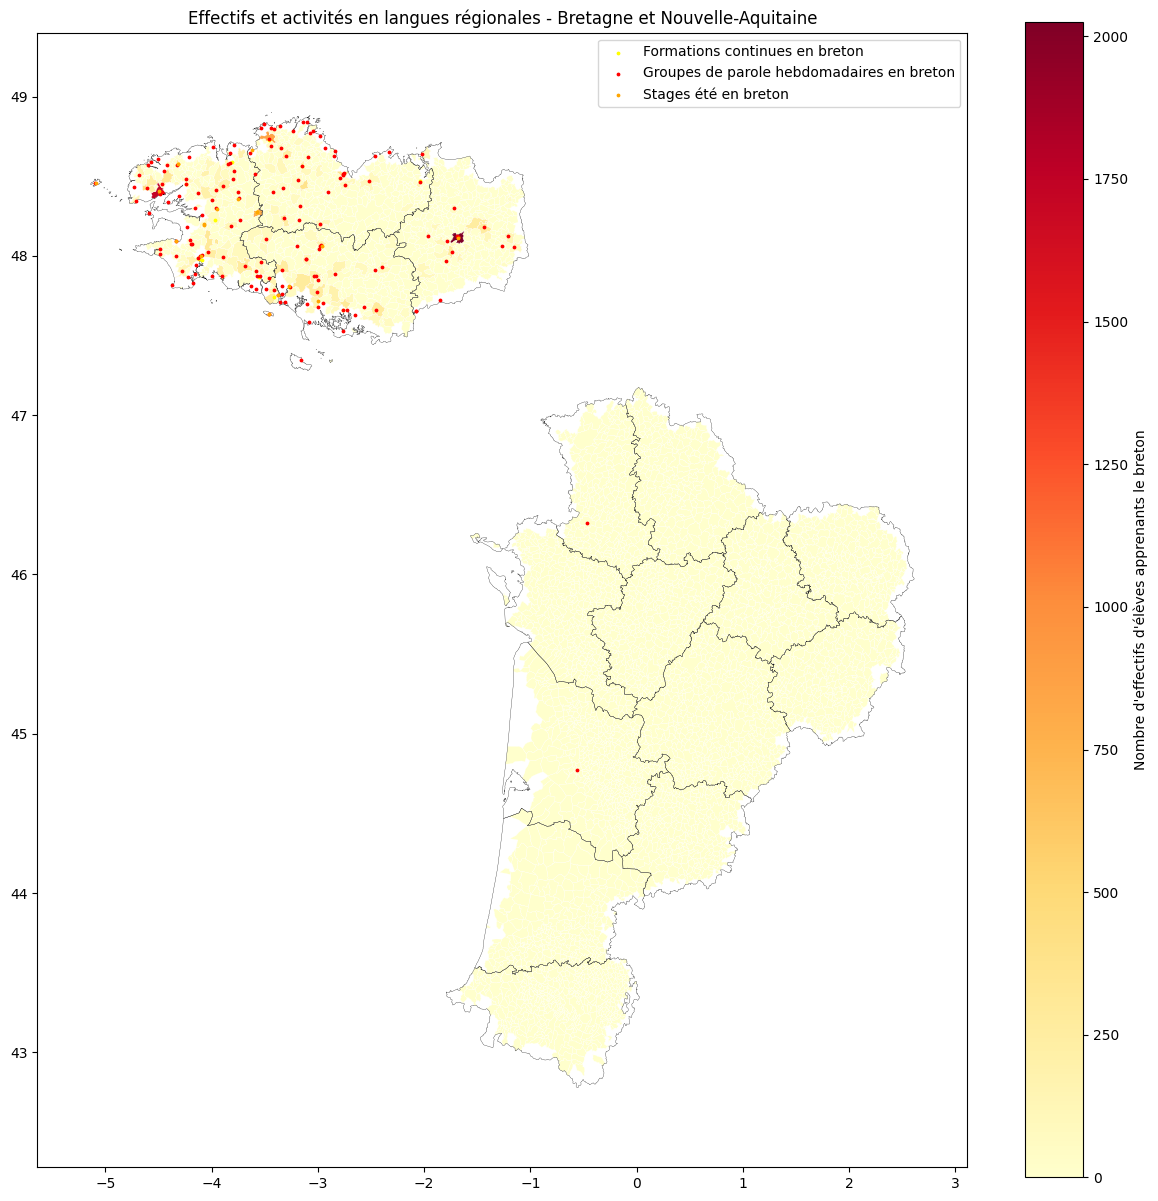

In [80]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# --- Charger les layers ---
communes = gpd.read_file(r"H:\CYTECHDATA\Downloads\communes.geojson")
dep_na   = gpd.read_file(r"H:\CYTECHDATA\Downloads\departements-nouvelle-aquitaine.geojson")
dep_bzh  = gpd.read_file(r"H:\CYTECHDATA\Downloads\departements-bretagne.geojson")

formations = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\formationslonguesbreton.geojson")
groupes    = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\groupeshebdomadairecours.geojson")
stages     = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\stageslanguesbretonne2025.geojson")

# --- Charger les effectifs ---
df_effectifs = pd.read_csv(
    r"H:\CYTECHDATA\Documents\4A\Effectifs-de-l-enseignement-bilingue-par-commune-en-2025.csv",
    sep=";",
    encoding="latin1"
)

# Création colonne effectif total
colonnes_effectifs = ['skol-vamm', 'skol-gentañ', 'skolaj', 'lise', 'hollad']
for col in colonnes_effectifs:
    df_effectifs[col] = pd.to_numeric(df_effectifs[col], errors='coerce').fillna(0).astype(int)
df_effectifs['effectif_total'] = df_effectifs[colonnes_effectifs].sum(axis=1)

# --- Assurer un même système de coordonnées ---
for gdf in [communes, dep_na, dep_bzh, formations, groupes, stages]:
    gdf.to_crs(epsg=4326, inplace=True)

# --- Fusionner les départements pour définir la zone d'intérêt ---
regions = gpd.GeoDataFrame(pd.concat([dep_na, dep_bzh], ignore_index=True))
region_union = regions.unary_union

# --- Filtrer les communes et points pour ne garder que ceux dans les deux régions ---
communes_region = communes[communes.geometry.within(region_union)]
formations_region = formations[formations.geometry.within(region_union)]
groupes_region = groupes[groupes.geometry.within(region_union)]
stages_region = stages[stages.geometry.within(region_union)]

# --- Joindre les effectifs aux communes ---
communes_region = communes_region.merge(
    df_effectifs[['kod_ebssa', 'effectif_total']],
    left_on='code',
    right_on='kod_ebssa',
    how='left'
)
communes_region['effectif_total'] = communes_region['effectif_total'].fillna(0)

# --- Plot ---
fig, ax = plt.subplots(figsize=(15, 15))

# --- Gradient sur les communes selon l'effectif avec titre de légende ---
communes_region.plot(
    column='effectif_total', ax=ax, cmap='YlOrRd',
    edgecolor='white', linewidth=0.2, legend=True,
    legend_kwds={'label': "Nombre d'effectifs d'élèves apprenants le breton"}
)


# Bords des départements
dep_na.plot(ax=ax, color="none", edgecolor="black", linewidth=0.2)
dep_bzh.plot(ax=ax, color="none", edgecolor="black", linewidth=0.2)

# Points
formations_region.plot(ax=ax, color="yellow", markersize=3, label="Formations continues en breton")
groupes_region.plot(ax=ax, color="red", markersize=3, label="Groupes de parole hebdomadaires en breton")
stages_region.plot(ax=ax, color="orange", markersize=3, label="Stages été en breton")

# Zoom sur la zone d'intérêt
minx, miny, maxx, maxy = region_union.bounds
ax.set_xlim(minx - 0.5, maxx + 0.5)
ax.set_ylim(miny - 0.5, maxy + 0.5)

# Affichage
ax.set_title("Effectifs et activités en langues régionales - Bretagne et Nouvelle-Aquitaine")
ax.legend()
plt.show()


C:\Users\cytech\AppData\Local\Temp\ipykernel_12524\3706824827.py:36: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  region_union = regions.unary_union
C:\Users\cytech\AppData\Local\Temp\ipykernel_12524\3706824827.py:45: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  na_union = dep_na.unary_union


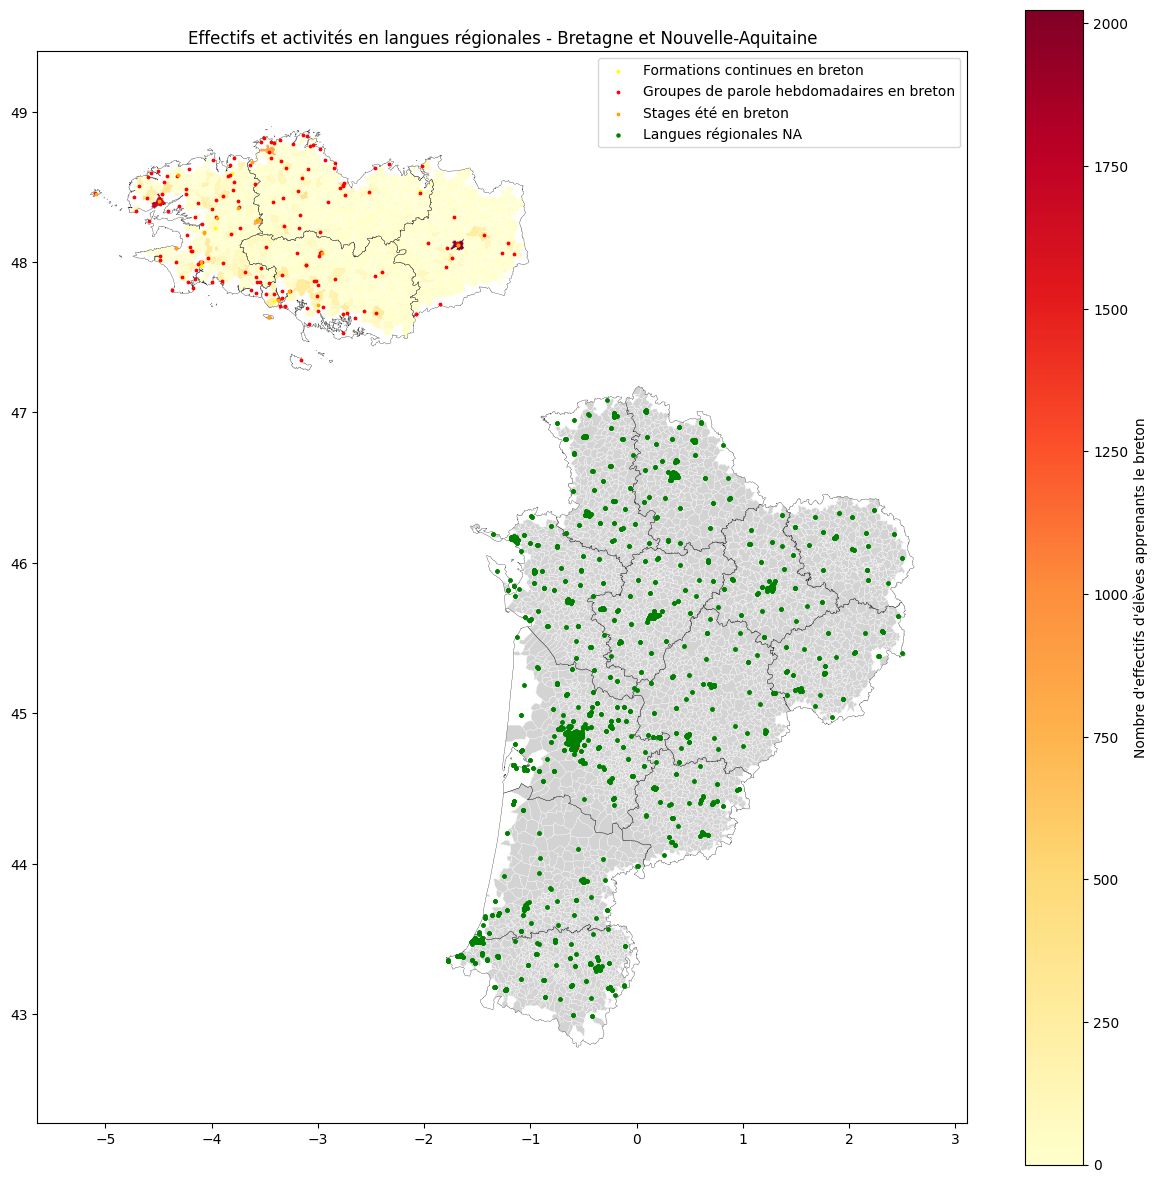

In [82]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# --- Charger les layers ---
communes = gpd.read_file(r"H:\CYTECHDATA\Downloads\communes.geojson")
dep_na   = gpd.read_file(r"H:\CYTECHDATA\Downloads\departements-nouvelle-aquitaine.geojson")
dep_bzh  = gpd.read_file(r"H:\CYTECHDATA\Downloads\departements-bretagne.geojson")

formations = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\formationslonguesbreton.geojson")
groupes    = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\groupeshebdomadairecours.geojson")
stages     = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\stageslanguesbretonne2025.geojson")

# --- Charger les langues régionales ---
langues_na = gpd.read_file(r"H:\CYTECHDATA\Downloads\fr-en-offre-langues-2d.geojson")

# --- Charger les effectifs ---
df_effectifs = pd.read_csv(
    r"H:\CYTECHDATA\Documents\4A\Effectifs-de-l-enseignement-bilingue-par-commune-en-2025.csv",
    sep=";",
    encoding="latin1"
)

# Création colonne effectif total
colonnes_effectifs = ['skol-vamm', 'skol-gentañ', 'skolaj', 'lise', 'hollad']
for col in colonnes_effectifs:
    df_effectifs[col] = pd.to_numeric(df_effectifs[col], errors='coerce').fillna(0).astype(int)
df_effectifs['effectif_total'] = df_effectifs[colonnes_effectifs].sum(axis=1)

# --- Assurer un même système de coordonnées ---
for gdf in [communes, dep_na, dep_bzh, formations, groupes, stages, langues_na]:
    gdf.to_crs(epsg=4326, inplace=True)

# --- Fusionner les départements pour définir la zone d'intérêt ---
regions = gpd.GeoDataFrame(pd.concat([dep_na, dep_bzh], ignore_index=True))
region_union = regions.unary_union

# --- Filtrer les communes et points pour ne garder que ceux dans les deux régions ---
communes_region = communes[communes.geometry.within(region_union)]
formations_region = formations[formations.geometry.within(region_union)]
groupes_region = groupes[groupes.geometry.within(region_union)]
stages_region = stages[stages.geometry.within(region_union)]

# --- Filtrer les langues régionales uniquement pour Nouvelle-Aquitaine ---
na_union = dep_na.unary_union
langues_na_region = langues_na[langues_na.geometry.within(na_union)]

# --- Joindre les effectifs aux communes ---
communes_region = communes_region.merge(
    df_effectifs[['kod_ebssa', 'effectif_total']],
    left_on='code',
    right_on='kod_ebssa',
    how='left'
)
communes_region['effectif_total'] = communes_region['effectif_total'].fillna(0)

# --- Séparer Bretagne et Nouvelle-Aquitaine ---
bretagne_codes = ['22', '29', '35', '56']
na_codes = ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87']

communes_bretagne = communes_region[communes_region['code'].str[:2].isin(bretagne_codes)]
communes_na       = communes_region[communes_region['code'].str[:2].isin(na_codes)]

# --- Plot ---
fig, ax = plt.subplots(figsize=(15, 15))

# Gradient uniquement pour la Bretagne
communes_bretagne.plot(
    column='effectif_total', ax=ax, cmap='YlOrRd',
    edgecolor='white', linewidth=0.2, legend=True,
    legend_kwds={'label': "Nombre d'effectifs d'élèves apprenants le breton"}
)

# Communes Nouvelle-Aquitaine en gris clair
communes_na.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.2)

# Bords des départements
dep_na.plot(ax=ax, color="none", edgecolor="black", linewidth=0.2)
dep_bzh.plot(ax=ax, color="none", edgecolor="black", linewidth=0.2)

# Points
formations_region.plot(ax=ax, color="yellow", markersize=3, label="Formations continues en breton")
groupes_region.plot(ax=ax, color="red", markersize=3, label="Groupes de parole hebdomadaires en breton")
stages_region.plot(ax=ax, color="orange", markersize=3, label="Stages été en breton")
langues_na_region.plot(ax=ax, color="green", markersize=5, label="Langues régionales NA")

# Zoom sur la zone d'intérêt
minx, miny, maxx, maxy = region_union.bounds
ax.set_xlim(minx - 0.5, maxx + 0.5)
ax.set_ylim(miny - 0.5, maxy + 0.5)

# Affichage
ax.set_title("Effectifs et activités en langues régionales - Bretagne et Nouvelle-Aquitaine")
ax.legend()
plt.show()


In [2]:
import geopandas as gpd

# Chemin vers ton fichier GeoJSON
fichier = r"H:\CYTECHDATA\Downloads\fr-en-offre-langues-2d.geojson"

# Lire le GeoJSON
gdf = gpd.read_file(fichier)

# Afficher les 5 premières lignes pour vérifier
print(gdf.head())

# Vérifier le type de géométrie et les colonnes
print(gdf.geometry.name)
print(gdf.columns)


        uai                                            libelle  \
0  0332846P                                   Lycée des Graves   
1  0590221V                                 Lycée Henri Wallon   
2  0740100G  Lycée général et technologique privé Saint-Jos...   
3  0911021R                        Lycée François Joseph Talma   
4  0570108H  Lycée des métiers des sciences et des techniqu...   

                       adresse enseignements    langues code_departement  \
0  238 cours Général-de-Gaulle           LV2   Allemand               33   
1    16 place de la République           LV2   Allemand               59   
2            16 avenue d'Evian           LV1    Anglais               74   
3              1 rue des Cerfs           LV2  Portugais               91   
4     15 route de la Briquerie           LV2    Italien               57   

    departement code_region                region code_academie    academie  \
0       Gironde          75    Nouvelle-Aquitaine             4    

C:\Users\cytech\AppData\Local\Temp\ipykernel_21284\1003662352.py:43: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  region_union = regions.unary_union
C:\Users\cytech\AppData\Local\Temp\ipykernel_21284\1003662352.py:52: DeprecationWarning: The 'unary_union' attribute is deprecated, use the 'union_all()' method instead.
  na_union = dep_na.unary_union


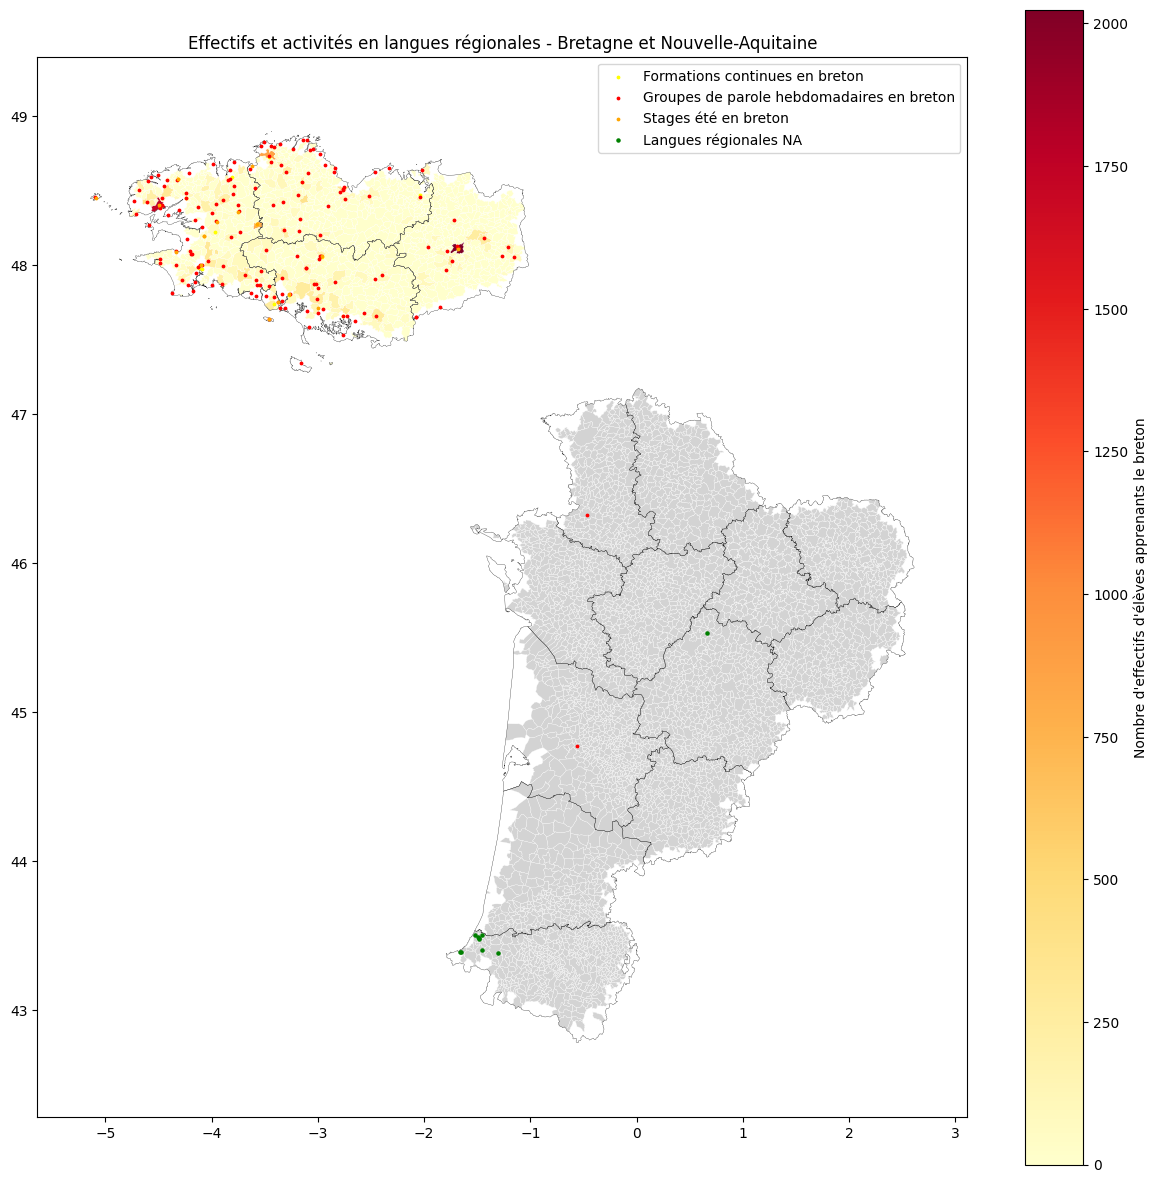

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# --- Charger les layers ---
communes = gpd.read_file(r"H:\CYTECHDATA\Downloads\communes.geojson")
dep_na   = gpd.read_file(r"H:\CYTECHDATA\Downloads\departements-nouvelle-aquitaine.geojson")
dep_bzh  = gpd.read_file(r"H:\CYTECHDATA\Downloads\departements-bretagne.geojson")

formations = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\formationslonguesbreton.geojson")
groupes    = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\groupeshebdomadairecours.geojson")
stages     = gpd.read_file(r"H:\CYTECHDATA\Documents\4A\stageslanguesbretonne2025.geojson")

# --- Charger les langues régionales ---
langues_na = gpd.read_file(r"H:\CYTECHDATA\Downloads\fr-en-offre-langues-2d.geojson")

# --- Filtrer uniquement les langues régionales ---
langues_regionales = ['Basque', 'Occitan', 'Catalan', 'Corse', 'Alsacien', 'Gascon', 
                      'Languedocien', 'Limousin', 'Provençal']

# Filtrer sur la colonne 'langues'
langues_na = langues_na[langues_na['langues'].isin(langues_regionales)]

# --- Charger les effectifs ---
df_effectifs = pd.read_csv(
    r"H:\CYTECHDATA\Documents\4A\Effectifs-de-l-enseignement-bilingue-par-commune-en-2025.csv",
    sep=";",
    encoding="latin1"
)

# Création colonne effectif total
colonnes_effectifs = ['skol-vamm', 'skol-gentañ', 'skolaj', 'lise', 'hollad']
for col in colonnes_effectifs:
    df_effectifs[col] = pd.to_numeric(df_effectifs[col], errors='coerce').fillna(0).astype(int)
df_effectifs['effectif_total'] = df_effectifs[colonnes_effectifs].sum(axis=1)

# --- Assurer un même système de coordonnées ---
for gdf in [communes, dep_na, dep_bzh, formations, groupes, stages, langues_na]:
    gdf.to_crs(epsg=4326, inplace=True)

# --- Fusionner les départements pour définir la zone d'intérêt ---
regions = gpd.GeoDataFrame(pd.concat([dep_na, dep_bzh], ignore_index=True))
region_union = regions.unary_union

# --- Filtrer les communes et points pour ne garder que ceux dans les deux régions ---
communes_region = communes[communes.geometry.within(region_union)]
formations_region = formations[formations.geometry.within(region_union)]
groupes_region = groupes[groupes.geometry.within(region_union)]
stages_region = stages[stages.geometry.within(region_union)]

# --- Filtrer les langues régionales uniquement pour Nouvelle-Aquitaine ---
na_union = dep_na.unary_union
langues_na_region = langues_na[langues_na.geometry.within(na_union)]

# --- Joindre les effectifs aux communes ---
communes_region = communes_region.merge(
    df_effectifs[['kod_ebssa', 'effectif_total']],
    left_on='code',
    right_on='kod_ebssa',
    how='left'
)
communes_region['effectif_total'] = communes_region['effectif_total'].fillna(0)

# --- Séparer Bretagne et Nouvelle-Aquitaine ---
bretagne_codes = ['22', '29', '35', '56']
na_codes = ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87']

communes_bretagne = communes_region[communes_region['code'].str[:2].isin(bretagne_codes)]
communes_na       = communes_region[communes_region['code'].str[:2].isin(na_codes)]

# --- Plot ---
fig, ax = plt.subplots(figsize=(15, 15))

# Gradient uniquement pour la Bretagne
communes_bretagne.plot(
    column='effectif_total', ax=ax, cmap='YlOrRd',
    edgecolor='white', linewidth=0.2, legend=True,
    legend_kwds={'label': "Nombre d'effectifs d'élèves apprenants le breton"}
)

# Communes Nouvelle-Aquitaine en gris clair
communes_na.plot(ax=ax, color='lightgrey', edgecolor='white', linewidth=0.2)

# Bords des départements
dep_na.plot(ax=ax, color="none", edgecolor="black", linewidth=0.2)
dep_bzh.plot(ax=ax, color="none", edgecolor="black", linewidth=0.2)

# Points
formations_region.plot(ax=ax, color="yellow", markersize=3, label="Formations continues en breton")
groupes_region.plot(ax=ax, color="red", markersize=3, label="Groupes de parole hebdomadaires en breton")
stages_region.plot(ax=ax, color="orange", markersize=3, label="Stages été en breton")
langues_na_region.plot(ax=ax, color="green", markersize=5, label="Langues régionales NA")

# Zoom sur la zone d'intérêt
minx, miny, maxx, maxy = region_union.bounds
ax.set_xlim(minx - 0.5, maxx + 0.5)
ax.set_ylim(miny - 0.5, maxy + 0.5)

# Affichage
ax.set_title("Effectifs et activités en langues régionales - Bretagne et Nouvelle-Aquitaine")
ax.legend()
plt.show()
